In [ ]:
import pandas as pd
from google.colab import drive

**LOAD DATA**

In [ ]:
#
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('/content/drive/MyDrive/STAT 390/convert_MCMF_ALL_TIME_DATA.csv', sep = '\t')

Mounted at /content/drive


<ipython-input-4-0a7292102cd3>:2: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/STAT 390/convert_MCMF_ALL_TIME_DATA.csv', sep = '\t')


In [ ]:
# load population data (used to calculate per capita metrics)
population_df = pd.read_csv('/content/drive/MyDrive/STAT 390/chicago_population.csv', ';').T

**PREPROCESSING**

In [ ]:
# Discard programs with min age over 25
df = df.loc[df['Min Age'] <= 25]

# Record programs with max age over 25 as family programs
df['Family Program'] = (df['Max Age'] > 25).astype(bool)

# Make category names unique
category_dict = {'Building And Fixing Things': 'Building & Fixing Things', 
 'Computers.': 'Computers', 
 'Food.': 'Food',
 'Helping Your Community.': 'Helping Your Community',
 'Reading & Writing.': 'Reading & Writing',
 'Sports + Wellness.': 'Sports & Wellness',
 'Work + Career': 'Work & Career'
}

df['Category Name'] = df['Category Name'].replace(category_dict)

# Group category names by STEM
stem_categories = ['Computers', 'Science', 'Building & Fixing Things', 'Science & Math', 'Digital Media.', 'Nature.', 'Math']
df['STEM'] = df['Category Name'].isin(stem_categories)
df['STEM'] = df['STEM'].map({True: 'STEM', False: 'Non-STEM'})

# Group min and max age by quartile
df['Min Age Quartile'] = pd.cut(df['Min Age'], bins=[0, 10, 17, 99, 200], labels=['0-10', '11-17','18-99', '100-200'])
df['Max Age Quartile'] = pd.cut(df['Max Age'], bins=[0, 3, 6, 13, 25], labels=['0-3', '4-6', '7-13','14-25'])

<ipython-input-5-e4c6c973545f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family Program'] = (df['Max Age'] > 25).astype(bool)


**ANALYSIS**

In [ ]:
# Exploring null values
df.isnull().sum()

# Examining the two observations without category names
df.loc[df['Program Name'] == 'Grab & Go Meals for Children & Teens']
df.loc[df['Program Name'] == 'Trunk or Treat at Shabbona']

# Examining observations with missing Geographic cluster names
geonan = df.loc[df['Geographic Cluster Name'].isnull()]
geonan.isnull().sum()

# Checking observations without geographic cluster name and no online address
geoonlinenan = geonan.loc[geonan['Online Address'].isnull()].groupby(by = 'Category Name')
num = geoonlinenan['Category Name'].count()

# Checking the actual category names
categories = df.groupby(by = 'Category Name')
categories['Category Name'].count()

# Locating observations with min_age = 25
df['Min Age'].dtype
df.loc[df['Min Age'] == 25]

,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food,Family Program,STEM,Min Age Quartile,Max Age Quartile
12050,"11,579",85023,NaN,Game Room at Hamilton,Challenge your friends to more than just board...,Chicago Park District,Sports & Wellness,10.0,25,99,...,Not Paid,NO,NO,41.762798,-87.637703,False,True,Non-STEM,18-99,NaN
15844,"16,008",89171,NaN,Basketball - Open at Addams #SpringForward,Gym facility is available for open play of bas...,Chicago Park District,Sports & Wellness,10.0,25,99,...,Not Paid,NO,NO,41.863098,-87.659698,False,True,Non-STEM,18-99,NaN
16789,"16,703",89798,NaN,Game Room at Hamilton,Challenge your friends to more than just board...,Chicago Park District,Sports & Wellness,10.0,25,99,...,Not Paid,NO,NO,41.762798,-87.637703,False,True,Non-STEM,18-99,NaN
17021,"18,207",90776,NaN,Pickleball at Gompers,Pickleball is a racquet sport which combines e...,Chicago Park District,Sports & Wellness,4.0,25,99,...,Not Paid,NO,NO,41.975800,-87.734398,False,True,Non-STEM,18-99,NaN
17029,"18,274",90838,NaN,Roller Skating at Ada,Adults skate around the park for recreational fun,Chicago Park District,Sports & Wellness,15.0,25,99,...,Not Paid,NO,NO,41.688400,-87.655998,False,True,Non-STEM,18-99,NaN
17778,"18,208",90777,NaN,Pickleball at Gompers,Pickleball is a racquet sport which combines e...,Chicago Park District,Sports & Wellness,4.0,25,99,...,Not Paid,NO,NO,41.975800,-87.734398,False,True,Non-STEM,18-99,NaN
18119,"16,009",89172,NaN,Basketball - Open at Addams,Gym facility is available for open play of bas...,Chicago Park District,Sports & Wellness,10.0,25,99,...,Not Paid,NO,NO,41.863098,-87.659698,False,True,Non-STEM,18-99,NaN
18639,"18,209",90778,NaN,Pickleball at Gompers,Pickleball is a racquet sport which combines e...,Chicago Park District,Sports & Wellness,4.0,25,99,...,Not Paid,NO,NO,41.975800,-87.734398,False,True,Non-STEM,18-99,NaN
19413,"16,010",89173,NaN,Basketball - Open at Addams,Gym facility is available for open play of bas...,Chicago Park District,Sports & Wellness,10.0,25,99,...,Not Paid,NO,NO,41.863098,-87.659698,False,True,Non-STEM,18-99,NaN
19724,"16,011",89174,NaN,Basketball - Open at Addams,Gym facility is available for open play of bas...,Chicago Park District,Sports & Wellness,10.0,25,99,...,Not Paid,NO,NO,41.863098,-87.659698,False,True,Non-STEM,18-99,NaN


        Geographic Cluster Name  Total Programs  Total Capacity  \
0                   IRVING PARK            7276        139872.0   
1                NEAR WEST SIDE            3452        118587.0   
2                   MORGAN PARK            3310      99160227.0   
3   Bronzeville/South Lakefront            2802       2269576.0   
4                       PULLMAN            2751         72315.0   
..                          ...             ...             ...   
74                  FULLER PARK             177          2962.0   
75                    HYDE PARK             115          8849.0   
76              CALUMET HEIGHTS              79          1397.0   
77                        OHARE               5           215.0   
78                     BURNSIDE               2           200.0   

    Average Max Age  Average Latitude  Average Capacity  
0         64.348406         41.952312         19.223749  
1         40.221611         41.867913         34.353129  
2         45.956495  

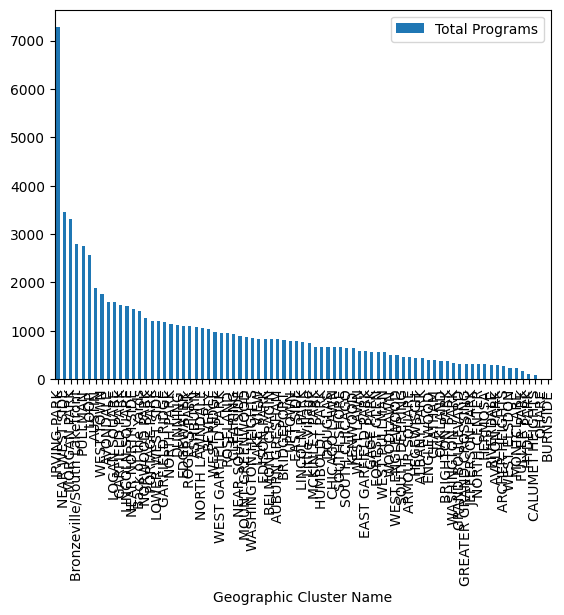

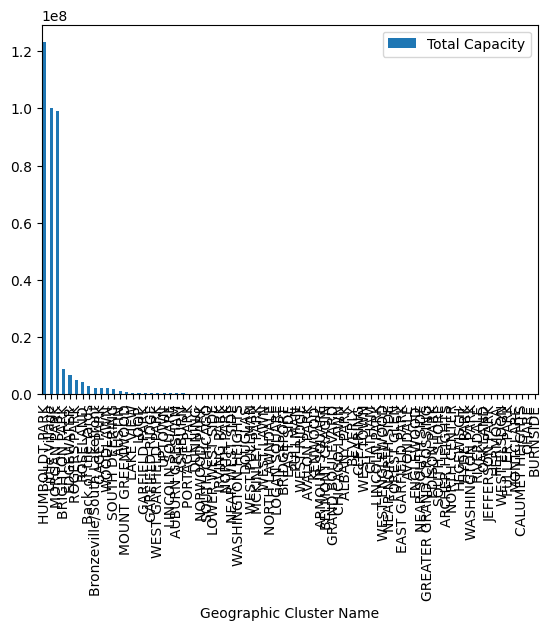

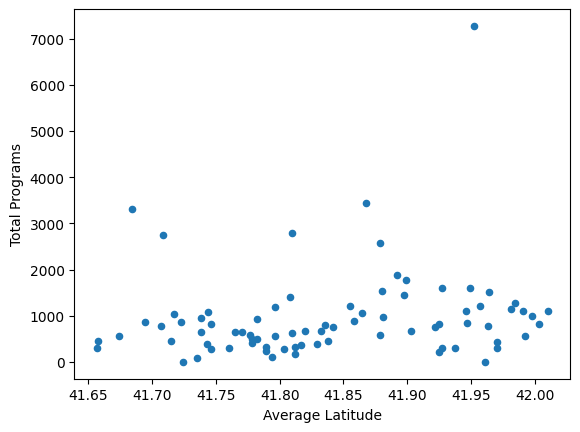

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

clusters = df.groupby('Geographic Cluster Name').agg({'Geographic Cluster Name': 'count', 'Capacity':'sum', 'Max Age':'mean', 'Latitude':'mean'})
clusters.columns = ['Total Programs', 'Total Capacity', 'Average Max Age', 'Average Latitude']
clusters['Average Capacity'] = clusters['Total Capacity'] / clusters['Total Programs']
clusters.sort_values('Total Programs', inplace=True, ascending=False)
clusters.reset_index(inplace=True)
print(clusters)

# Train on total capacity for different program types?
    # Cluster, Type, 
    # Make a binary column for online/in-person
    
# Add population for per capita

clusters.plot.bar(x='Geographic Cluster Name', y='Total Programs')
clusters.sort_values('Total Capacity', ascending=False).plot.bar(x='Geographic Cluster Name', y='Total Capacity')
clusters.plot(kind='scatter', x='Average Latitude', y='Total Programs')

# Train on total capacity for different program types

    ## Important Predictors- what to group by?
    # Cluster (location)
    # Category (make subcategories?)
    # Binary online/in-person
    
    ## Other features to create/use?
    # Time of the year?
    # Price?
    
    ## 
    # Other predictors?
    # Other metrics/interactions to analyze?

grouped = clusters = df.groupby(['Geographic Cluster Name', 'Category Name', 'Meeting Type']).agg({'Geographic Cluster Name': 'count', 'Capacity':'sum', 'Max Age':'mean', 'Latitude':'mean'})
grouped.columns = ['Total Programs', 'Total Capacity', 'Average Max Age', 'Average Latitude']
grouped['Average Capacity'] = grouped['Total Capacity'] / grouped['Total Programs']


grouped.reset_index(inplace=True)
print(grouped)

# This grouped dataframe will evolve with new enigneered predictors and metrics. We will use this as out training data to assess equity moving forward
